In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.interpolate import make_interp_spline
from sklearn.metrics import r2_score
import matplotlib.pylab as pylab

In [16]:
model_name = 'cnnetdiopters_100_0'
# get part before _ in model_name
model_type = model_name.split('_')[0]
print('Model type: ', model_type)
current_path = os.getcwd()
path = os.path.abspath(os.path.join(current_path, 'results', model_type, model_name))


# load losses.npy, vlosses.npy, y_pred.npy and y_test.npy
#losses = np.load(os.path.join(path, 'losses.npy'))
#vlosses = np.load(os.path.join(path, 'vlosses.npy'))
y_pred = np.load(os.path.join(path, 'y_pred.npy'))
y_test = np.load(os.path.join(path, 'y_test.npy'))
print(len(y_test))
print(len(y_pred))

#y_pred = 1 / y_pred * 20
#y_test = 1 / y_test * 20

max = 16

figwidth_fraction = 0.5
base_font_size_labels = 8
base_font_size_ticks = 7

label_font_size = base_font_size_labels / figwidth_fraction
tick_font_size = base_font_size_ticks / figwidth_fraction

params_plt = {'legend.fontsize': label_font_size,
         'axes.labelsize': label_font_size,
         'axes.titlesize': label_font_size,
         'xtick.labelsize': tick_font_size,
         'ytick.labelsize': tick_font_size}
pylab.rcParams.update(params_plt)

Model type:  cnnetdiopters
30007
30007


In [17]:
"""
plt.plot(losses, label='Training loss')
plt.plot(vlosses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 0.002)
plt.legend()
plt.show()
"""

"\nplt.plot(losses, label='Training loss')\nplt.plot(vlosses, label='Validation loss')\nplt.xlabel('Epoch')\nplt.ylabel('Loss')\nplt.ylim(0, 0.002)\nplt.legend()\nplt.show()\n"

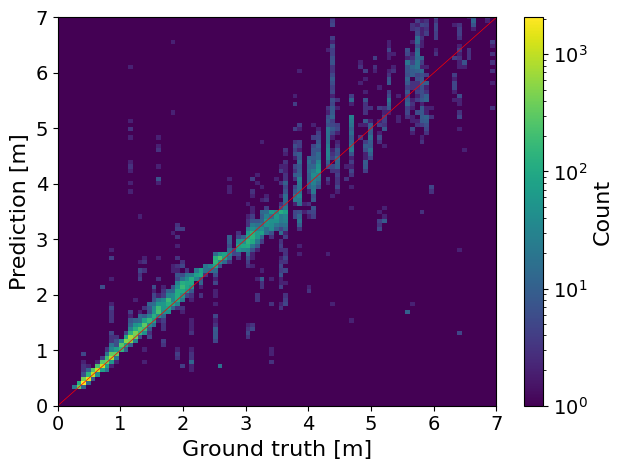

In [18]:
plt.hist2d(y_test, y_pred, bins=200, cmap='viridis', range=[[0, 15], [0, 15]], rasterized=True, norm=plt.cm.colors.LogNorm())#norm=plt.cm.colors.PowerNorm(gamma=0.5))# norm=plt.cm.colors.LogNorm()) 

plt.xlabel('Ground truth [m]')
plt.ylabel('Prediction [m]')
plt.xlim(0, 7)
plt.ylim(0, 7)

# logarithmic scale for colormap
#import matplotlib.ticker as ticker
#formatter=ticker.LogFormatterMathtext()
#plt.colorbar(format=formatter)

# set background color to black
plt.gca().set_facecolor(plt.get_cmap('viridis')(0))

# call lowest color value from cmap


# add colormap label
#plt.colorbar()
plt.colorbar().set_label('Count')
# plot the line of equality
plt.plot([0, 20], [0, 20], color='red', linewidth=0.5)
plt.tight_layout()
plt.savefig(model_name + '_hist.pdf', dpi=900)
plt.show()

In [19]:
print('Metrics:')

print('Mean squared error:', np.mean((y_test - y_pred) ** 2))
print('RMSE:', np.sqrt(np.mean((y_test - y_pred) ** 2)))
print('Mean absolute error:', np.mean(np.abs(y_test - y_pred)))
print('Mean error:', np.mean(y_pred - y_test))
print('R^2:', r2_score(y_pred, y_test))
print('Median absolute error:', np.median(np.abs(y_test - y_pred)))


R_sq = r2_score(y_test, y_pred)
print('R^2:', R_sq)

print('In diopters:')

print('Mean squared error', np.mean((1 / y_test - 1 / y_pred) ** 2))	
print('RMSE: ', np.sqrt(np.mean((1 / y_test - 1 / y_pred) ** 2)))
print('Mean absolute error', np.mean(np.abs(1 / y_test - 1 / y_pred)))
print('Mean error', np.mean(1 / y_pred - 1 / y_test))
print('R^2', r2_score(1 / y_pred, 1 / y_test))
print('Median absolute error: ', np.median(np.abs(1 / y_test - 1 / y_pred)))

error_diopters = np.abs(1 / y_pred - 1 / y_test)
error = np.abs(y_pred - y_test)
percent_below_125 = np.sum(error_diopters < 0.125) / len(error_diopters) * 100
percent_below_001_m = np.sum(error < 0.01) / len(error) * 100
percent_below_01 = np.sum(error < 0.1) / len(error) * 100
percent_below_02 = np.sum(error_diopters < 0.25) / len(error_diopters) * 100

print('Percent below 0.125 diopters:', percent_below_125)
print('Percent below 0.01 m:', percent_below_001_m)
print('Percent below 0.1 m:', percent_below_01)
print('Percent below 0.2 m:', percent_below_02)

Metrics:
Mean squared error: 1.4725194
RMSE: 1.2134742
Mean absolute error: 0.3510696
Mean error: 0.15226164
R^2: 0.8563517808752286
Median absolute error: 0.05369568
R^2: 0.7907460586851982
In diopters:
Mean squared error 0.007843128
RMSE:  0.08856144
Mean absolute error 0.044213686
Mean error -0.024381053
R^2 0.9855844387108057
Median absolute error:  0.02797389
Percent below 0.125 diopters: 95.59436131569299
Percent below 0.01 m: 18.43569833705469
Percent below 0.1 m: 64.46829073216249
Percent below 0.2 m: 98.19708734628587


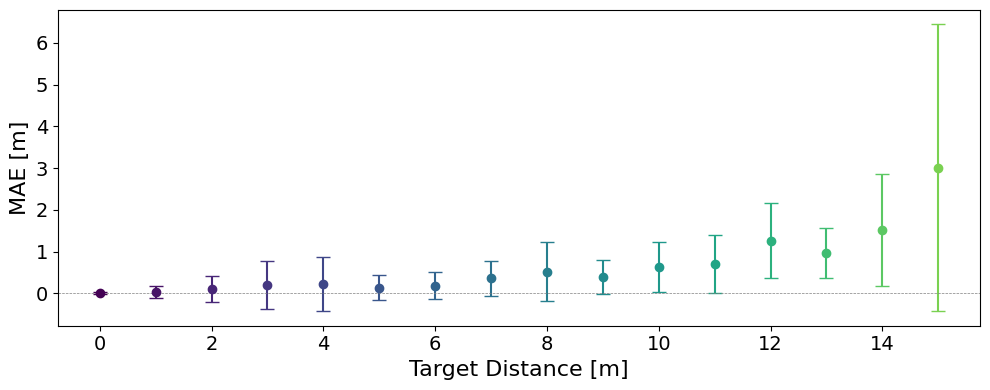

Min mean error: 0.011544869
Max mean error: 3.0071223
Min std error: 0.027353486
Max std error: 3.436397
Median mean error: 0.37656677
Mean median error: 0.46599862
Min median error: 0.008284271
Max median error: 2.138929


In [20]:

errors = np.abs(y_test - y_pred)

# bin errors by distance, in binsize=1 m bins, but put everything from 7m on in one bin
bins = np.arange(0, 8, 0.5)
bins = np.append(bins, 20)
bin_indices = np.digitize(y_test, bins)

# calculate mean and standard deviation of errors per bin
mean_errors_per_bin = np.array([np.mean(errors[bin_indices == i]) for i in range(1, len(bins))])
std_errors_per_bin = np.array([np.std(errors[bin_indices == i]) for i in range(1, len(bins))])
median_errors_per_bin = np.array([np.median(errors[bin_indices == i]) for i in range(1, len(bins))])
# plot depending on distance
fig, ax = plt.subplots(figsize=(10, 4))

colors = plt.cm.viridis(np.linspace(0, 0.8, len(std_errors_per_bin)))  # You can choose any colormap

# Plot each data point with a different color
for i in range(len(std_errors_per_bin)):
    plt.errorbar(i, mean_errors_per_bin[i], yerr=std_errors_per_bin[i], fmt='o', color=colors[i], capsize=5)

#plt.show()
#plt.errorbar(np.unique(idx), mean_ang_diff_per_id, yerr=std_ang_diff_per_id, fmt='o', color=basecolor)
plt.xlabel('Target Distance [m]')
plt.ylabel('MAE [m]')
# add horizontal line at y=0
plt.axhline(0, color='grey', linewidth=0.5, linestyle='--')
plt.tight_layout()
#plt.savefig(os.path.join(model + 'mlp_error_over_distance.pdf'), format='pdf', dpi=1000)
plt.show()

print('Min mean error:', np.min(mean_errors_per_bin))
print('Max mean error:', np.max(mean_errors_per_bin))
print('Min std error:', np.min(std_errors_per_bin))
print('Max std error:', np.max(std_errors_per_bin))
print('Median mean error:', np.median(mean_errors_per_bin)) 

print('Mean median error:', np.mean(median_errors_per_bin))
print('Min median error:', np.min(median_errors_per_bin))
print('Max median error:', np.max(median_errors_per_bin))

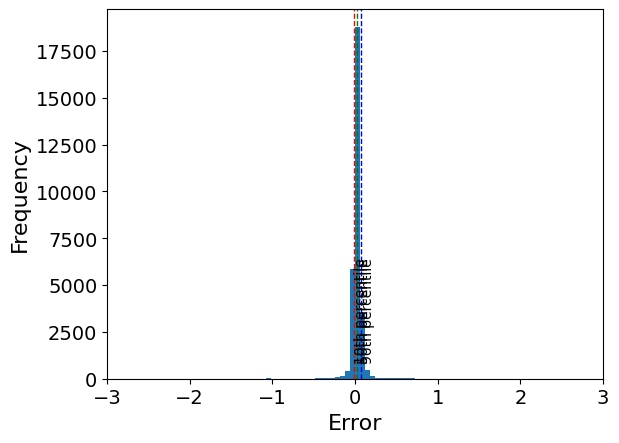

In [21]:
errors = 1 / y_test - 1 / y_pred

# plot histogram of errors
plt.hist(errors, bins=100, range=(-3, 3))
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.xlim(-3, 3)

# add vertical lines at 50% and 90% percentile
#percentiles = np.percentile(errors, [2.28, 15.87, 50, 84.13, 97.72])
percentiles = np.percentile(errors, [10, 50, 90])
plt.axvline(percentiles[0], color='red', linestyle='dashed', linewidth=1, label='10th percentile')
plt.axvline(percentiles[1], color='green', linestyle='dashed', linewidth=1, label='50th percentile')
plt.axvline(percentiles[2], color='blue', linestyle='dashed', linewidth=1, label='90th percentile')
#plt.axvline(percentiles[3], color='green', linestyle='dashed', linewidth=1)
#plt.axvline(percentiles[4], color='red', linestyle='dashed', linewidth=1)

# add appropriate labels
plt.text(percentiles[0], 1000, '10th percentile', rotation=90)
plt.text(percentiles[1], 1000, '50th percentile', rotation=90)
plt.text(percentiles[2], 1000, '90th percentile', rotation=90)
#plt.text(percentiles[3], 1000, '95% percentile', rotation=90)
#plt.text(percentiles[4], 1000, '50% percentile', rotation=90)



plt.show()

Errors near:


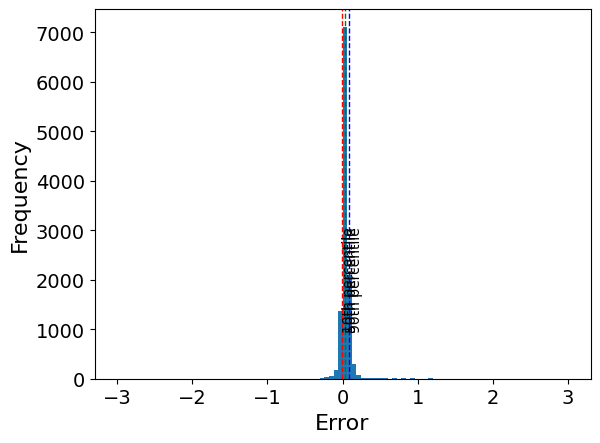

Error far:


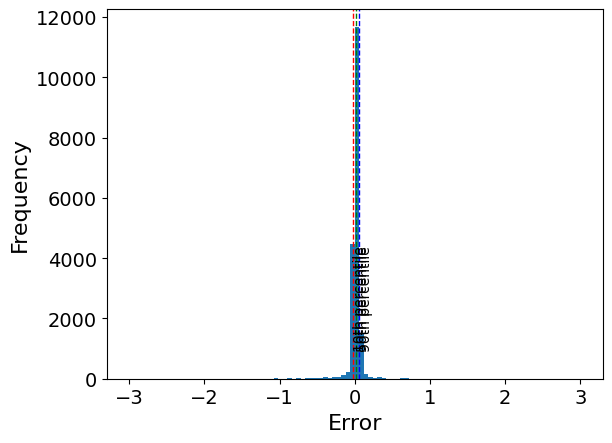

In [22]:
# do the evaluation separately for all values with y_test < 1 and y_test > 1
errors_near = errors[y_test < 1]
errors_far = errors[y_test >= 1]

print('Errors near:')
# plot histogram of errors
plt.hist(errors_near, bins=100, range=(-3, 3))
plt.xlabel('Error')
plt.ylabel('Frequency')

# add vertical lines at 50% and 90% percentile
#percentiles = np.percentile(errors, [2.28, 15.87, 50, 84.13, 97.72])
percentiles = np.percentile(errors_near, [10, 50, 90])
plt.axvline(percentiles[0], color='red', linestyle='dashed', linewidth=1, label='10th percentile')
plt.axvline(percentiles[1], color='green', linestyle='dashed', linewidth=1, label='50th percentile')
plt.axvline(percentiles[2], color='blue', linestyle='dashed', linewidth=1, label='90th percentile')

# add appropriate labels
plt.text(percentiles[0], 1000, '10th percentile', rotation=90)
plt.text(percentiles[1], 1000, '50th percentile', rotation=90)
plt.text(percentiles[2], 1000, '90th percentile', rotation=90)

plt.show()

print('Error far:')
# plot histogram of errors
plt.hist(errors_far, bins=100, range=(-3, 3))
plt.xlabel('Error')
plt.ylabel('Frequency')

# add vertical lines at 50% and 90% percentile
#percentiles = np.percentile(errors, [2.28, 15.87, 50, 84.13, 97.72])
percentiles = np.percentile(errors_far, [10, 50, 90])
plt.axvline(percentiles[0], color='red', linestyle='dashed', linewidth=1, label='10th percentile')
plt.axvline(percentiles[1], color='green', linestyle='dashed', linewidth=1, label='50th percentile')
plt.axvline(percentiles[2], color='blue', linestyle='dashed', linewidth=1, label='90th percentile')

# add appropriate labels
plt.text(percentiles[0], 1000, '10th percentile', rotation=90)
plt.text(percentiles[1], 1000, '50th percentile', rotation=90)
plt.text(percentiles[2], 1000, '90th percentile', rotation=90)

plt.show()

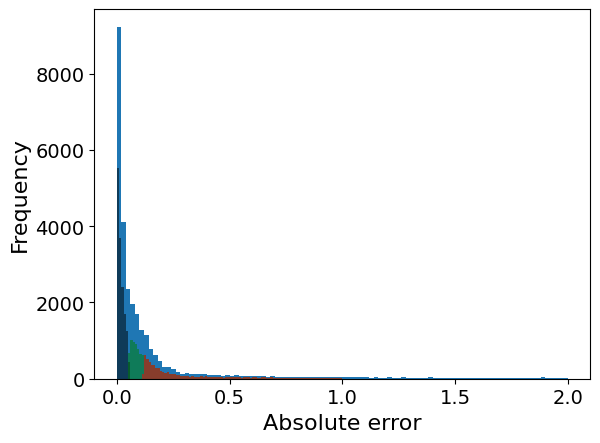

In [23]:
errors = np.abs(y_test - y_pred)

# plot histogram of errors
plt.xlabel('Absolute error')
plt.ylabel('Frequency')
plt.hist(errors, bins=100, range=(0, 2))

# add vertical lines at 50% and 90% percentile
percentiles = np.percentile(errors, [50, 68.26, 95.44])

# color bins according to which percentile they belong to
plt.hist(errors[errors <= percentiles[0]], bins=100, range=(0, 1), color='black', alpha=0.5)
plt.hist(errors[errors > percentiles[0]], bins=100, range=(0, 1), color='green', alpha=0.5)
plt.hist(errors[errors > percentiles[1]], bins=100, range=(0, 1), color='red', alpha=0.5)
plt.hist(errors[errors > percentiles[2]], bins=100, range=(0, 1), color='blue', alpha=0.5)



plt.show()

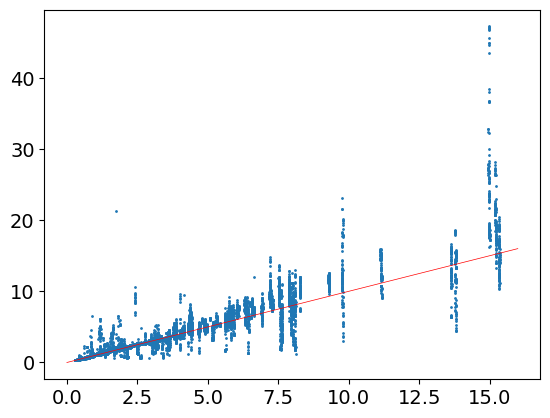

In [24]:
# plot y_test vs y_pred, the function f(x) = x and the 50 and 90% percentiles, connected with a smoothened line
plt.scatter(y_test, y_pred, s=1)
plt.plot([0, max], [0, max], color='red', linewidth=0.5)
plt.show()

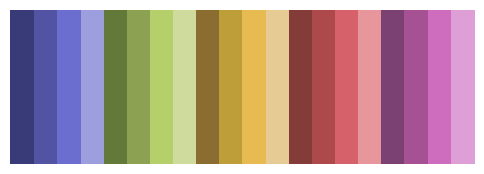

In [25]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 2))

# Create a colormap using tab20b
cmap = plt.get_cmap('tab20b')

# Create a gradient image using numpy
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))  # Stack to make it visible

# Plot the gradient image with the tab20b colormap
ax.imshow(gradient, aspect='auto', cmap=cmap)

# Remove axis for better visibility of the colormap
ax.set_axis_off()

# Display the colormap
plt.show()

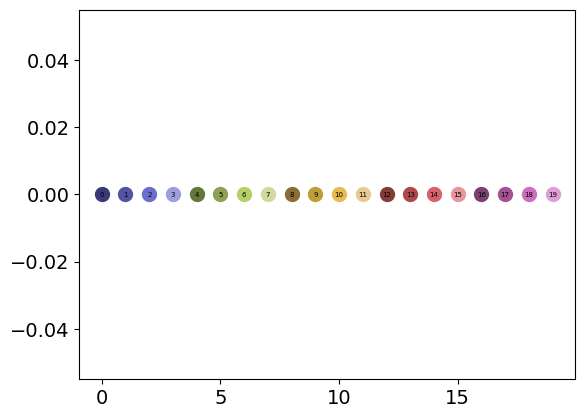

In [26]:
# plot color and corresponding number of cmap
for i in range(20):
    plt.scatter(i, 0, color=cmap(i), s=100)
    plt.text(i, 0, str(i), color='black', fontsize=5, ha='center', va='center')

(0.4196078431372549, 0.43137254901960786, 0.8117647058823529, 1.0)
(0.807843137254902, 0.42745098039215684, 0.7411764705882353, 1.0)
(0.611764705882353, 0.6196078431372549, 0.8705882352941177, 1.0)


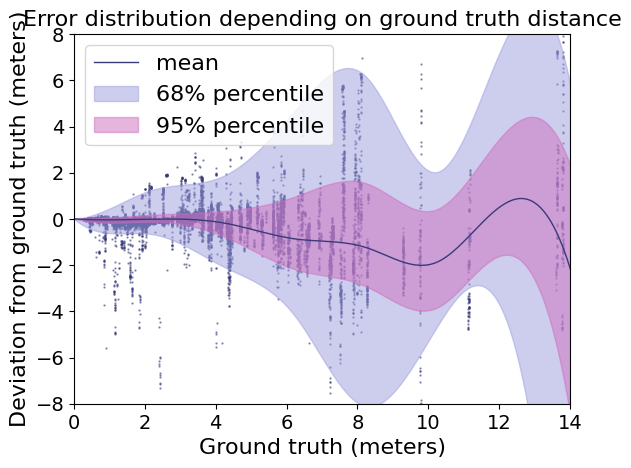

In [27]:
stepsize = 2
max = 16

color_50 = cmap(2)
color_95 = cmap(18)
color_99 = cmap(3)

print(color_50)
print(color_95)
print(color_99)
lwidth = 0

errors = y_test - y_pred

# plot scatterplot of errors
plt.scatter(y_test, errors, color=cmap(0), s=0.5, alpha=0.5)
plt.xlabel('Ground truth')
plt.ylabel('Error')

plt.ylim(-8, 8)
plt.xlim(0,max-stepsize)

bins = np.arange(0, max + stepsize, stepsize)

percentiles = np.zeros((len(bins), 5))
means = np.zeros(len(bins))

for i in range(len(bins) - 1):
    lower = bins[i]
    upper = bins[i+1]

    indices = np.where((y_test >= lower) & (y_test < upper))
    errors_bin = errors[indices]
    if len(errors_bin) == 0:
        percentiles[i] = 0
        means[i] = 0
    else:
        percentiles[i] = np.percentile(errors_bin, [2.28, 15.87, 50, 84.13, 97.72])
        means[i] = np.mean(errors_bin)


# drop columns in percentiles where all values are 0
indices_1 = np.where(np.logical_or(percentiles[:, 0] != 0, percentiles[:, 1] != 0, percentiles[:, 2] != 0))
indices_2 = np.where(np.logical_or(percentiles[:, 4] != 0, percentiles[:, 4] != 0))

indices = np.unique(np.concatenate((indices_1, indices_2)))

percentiles = percentiles[indices]
means = means[indices]
bins = bins[indices]

bins = bins + 0.25
x = np.insert(bins, 0, 0)

percentiles = np.insert(percentiles, 0, [0, 0, 0, 0, 0], axis=0)
means = np.insert(means, 0, 0)
x_smooth = np.linspace(0, max, 300)

spl_1 = make_interp_spline(x, percentiles[:,0], k=3)
p1_smooth = spl_1(x_smooth)

spl_5 = make_interp_spline(x, percentiles[:,1], k=3)
p5_smooth = spl_5(x_smooth)

spl_50 = make_interp_spline(x, percentiles[:,2], k=3)
p50_smooth = spl_50(x_smooth)

spl_95 = make_interp_spline(x, percentiles[:,3], k=3)
p95_smooth = spl_95(x_smooth)

spl_99 = make_interp_spline(x, percentiles[:,4], k=3)
p99_smooth = spl_99(x_smooth)

plt.plot(x_smooth, p1_smooth, color=color_99, linewidth=lwidth)
plt.plot(x_smooth, p5_smooth, color=color_95, linewidth=lwidth)
plt.plot(x_smooth, p50_smooth, color=cmap(0), linewidth=1, label='mean')
plt.plot(x_smooth, p95_smooth, color=color_95, linewidth=lwidth)
plt.plot(x_smooth, p99_smooth, color=color_99, linewidth=lwidth)

# fill between 1 and 99 percentiles, 5 and 95 percentiles
plt.fill_between(x_smooth, p1_smooth, p99_smooth, color=color_99, alpha=0.5, label='68% percentile')
plt.fill_between(x_smooth, p5_smooth, p95_smooth, color=color_95, alpha=0.5, label='95% percentile')

plt.xlabel('Ground truth (meters)')
plt.ylabel('Deviation from ground truth (meters)')
plt.title('Error distribution depending on ground truth distance')
plt.legend()
plt.show()

color 95: 206.81, 109.43, 189.74  
color 99: 156.61, 158.62, 222.87

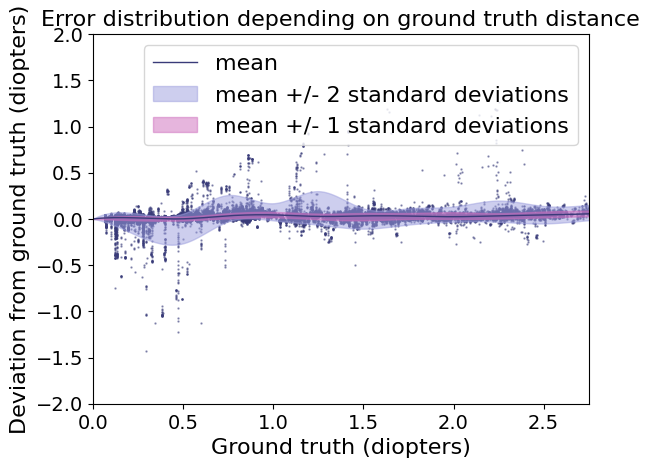

In [28]:
color_50 = cmap(2)
color_95 = cmap(18)
color_99 = cmap(3)
lwidth = 0

y_test = 1 / y_test
y_pred = 1 / y_pred
max = 3
stepsize = 0.25

errors = y_test - y_pred

# plot scatterplot of errors
plt.scatter(y_test, errors, color=cmap(0), s=0.5, alpha=0.5)
plt.xlabel('Ground truth (diopters)')
plt.ylabel('Error (diopters)')

plt.ylim(-2, 2)
plt.xlim(0,max-stepsize)

bins = np.arange(0, max + stepsize, stepsize)

percentiles = np.zeros((len(bins), 5))
means = np.zeros(len(bins))

for i in range(len(bins) - 1):
    lower = bins[i]
    upper = bins[i+1]

    indices = np.where((y_test >= lower) & (y_test < upper))
    errors_bin = errors[indices]
    if len(errors_bin) == 0:
        percentiles[i] = 0
        means[i] = 0
    else:
        percentiles[i] = np.percentile(errors_bin, [2.28, 15.87, 50, 84.13, 97.72])
        means[i] = np.mean(errors_bin)


# drop columns in percentiles where all values are 0
indices_1 = np.where(np.logical_or(percentiles[:, 0] != 0, percentiles[:, 1] != 0, percentiles[:, 2] != 0))
indices_2 = np.where(np.logical_or(percentiles[:, 4] != 0, percentiles[:, 4] != 0))

indices = np.unique(np.concatenate((indices_1, indices_2)))

percentiles = percentiles[indices]
means = means[indices]
bins = bins[indices]

bins = bins + 0.25
x = np.insert(bins, 0, 0)

percentiles = np.insert(percentiles, 0, [0, 0, 0, 0, 0], axis=0)
means = np.insert(means, 0, 0)
x_smooth = np.linspace(0, max, 300)

spl_1 = make_interp_spline(x, percentiles[:,0], k=3)
p1_smooth = spl_1(x_smooth)

spl_5 = make_interp_spline(x, percentiles[:,1], k=3)
p5_smooth = spl_5(x_smooth)

spl_50 = make_interp_spline(x, percentiles[:,2], k=3)
p50_smooth = spl_50(x_smooth)

spl_95 = make_interp_spline(x, percentiles[:,3], k=3)
p95_smooth = spl_95(x_smooth)

spl_99 = make_interp_spline(x, percentiles[:,4], k=3)
p99_smooth = spl_99(x_smooth)

plt.plot(x_smooth, p1_smooth, color=color_99, linewidth=lwidth)
plt.plot(x_smooth, p5_smooth, color=color_95, linewidth=lwidth)
plt.plot(x_smooth, p50_smooth, color=cmap(0), linewidth=1, label='mean')
plt.plot(x_smooth, p95_smooth, color=color_95, linewidth=lwidth)
plt.plot(x_smooth, p99_smooth, color=color_99, linewidth=lwidth)

#plt.scatter(y_test, y_pred, color='grey', s=0.5)
# Scatter points for y1 and y2
#plt.scatter(x, y1, color="red", marker='o')
#plt.scatter(x, y2, color="green", marker='o')

# fill between y3 and y2
plt.fill_between(x_smooth, p1_smooth, p99_smooth, color=color_99, alpha=0.5, label='mean +/- 2 standard deviations')
plt.fill_between(x_smooth, p5_smooth, p95_smooth, color=color_95, alpha=0.5, label='mean +/- 1 standard deviations')

plt.xlabel('Ground truth (diopters)')
plt.ylabel('Deviation from ground truth (diopters)')
plt.title('Error distribution depending on ground truth distance')
plt.legend()
plt.show()

# compute 1,5,50,95,99 percentiles for stepsize bins